<a href="https://colab.research.google.com/github/sanjeevtrivedi/pgd-dsai/blob/main/ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [ ]:
# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6])

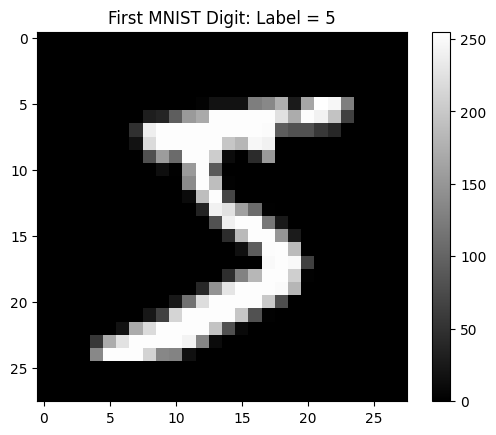

In [ ]:

first_image_pixels = X[0]

# Reshape the 784 pixels to a 28x28 array
image_2d = first_image_pixels.reshape(28, 28)


plt.figure()
plt.imshow(image_2d, cmap='gray', interpolation='nearest') # 'gray_r' for inverted grayscale, common for MNIST
plt.title(f"First MNIST Digit: Label = {y[0]}")
plt.colorbar()
plt.show()

In [ ]:
indices = []
for digit in range(10):
    digit_indices = np.where(y == digit)[0]
    sampled_indices = np.random.choice(digit_indices, size=200, replace=False)  # 200 of each digit
    indices.extend(sampled_indices)

# Use the sampled indices
X_sampled = X[indices]
y_sampled = y[indices]

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

# PCA pre-reduction to 50 dimensions
pca50 = PCA(n_components=50, random_state=42)
X_pca50 = pca50.fit_transform(X_scaled)

# PCA 2D for comparison
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)

In [ ]:
# 2. t-SNE Embedding
perplexities = [5,30,50,80,100]
embeddings = []

# Compute t-SNE embeddings for different perplexity values
for perp in perplexities:
    print(f"Computing t-SNE with perplexity={perp}...")
    tsne = TSNE(n_components=2, perplexity=perp, learning_rate=200,
                n_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(X_pca50)
    embeddings.append(X_tsne)
    print(f"Done with perplexity={perp}")



Computing t-SNE with perplexity=5...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Done with perplexity=5
Computing t-SNE with perplexity=30...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Done with perplexity=30
Computing t-SNE with perplexity=50...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Done with perplexity=50
Computing t-SNE with perplexity=80...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Done with perplexity=80
Computing t-SNE with perplexity=100...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Done with perplexity=100


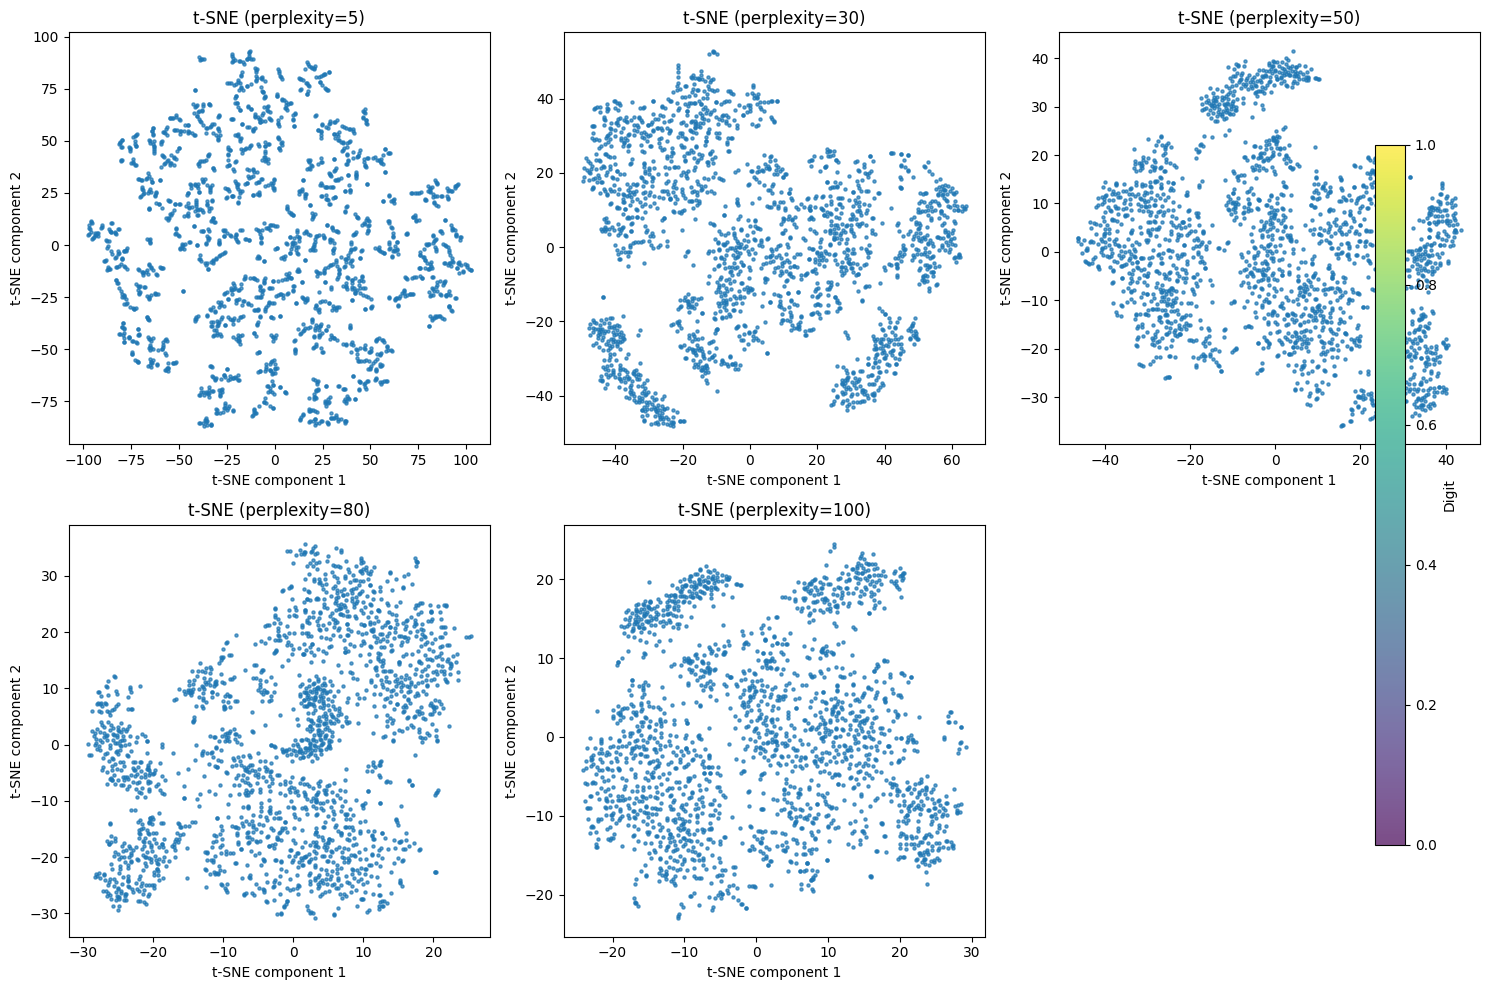

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each embedding
for i, perp in enumerate(perplexities):
    if i < len(axes):  # Make sure we don't go out of bounds
        # scatter = axes[i].scatter(embeddings[i][:, 0], embeddings[i][:, 1],
        #                          c=y_sampled, cmap='tab10', s=5, alpha=0.7)
        scatter = axes[i].scatter(embeddings[i][:, 0], embeddings[i][:, 1],
                                  s=5, alpha=0.7)
        axes[i].set_title(f't-SNE (perplexity={perp})')
        axes[i].set_xlabel('t-SNE component 1')
        axes[i].set_ylabel('t-SNE component 2')

# Hide the unused 6th subplot
if len(perplexities) < len(axes):
    axes[-1].set_visible(False)

# Add a colorbar to the RIGHT of the entire figure, not inside any subplot
plt.tight_layout()
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, label='Digit')

plt.savefig('tsne_perplexities.png')
plt.show()

In [ ]:
silhouette_scores = []
for embedding in embeddings:
    score = silhouette_score(embedding, y_sampled)
    silhouette_scores.append(score)

# Display scores in a table
score_table = pd.DataFrame({
    'Perplexity': perplexities,
    'Silhouette Score': silhouette_scores
})
print("\nSilhouette Scores:")
print(score_table)


Silhouette Scores:
   Perplexity  Silhouette Score
0           5          0.172462
1          30          0.187577
2          50          0.185845
3          80          0.152427
4         100          0.136075


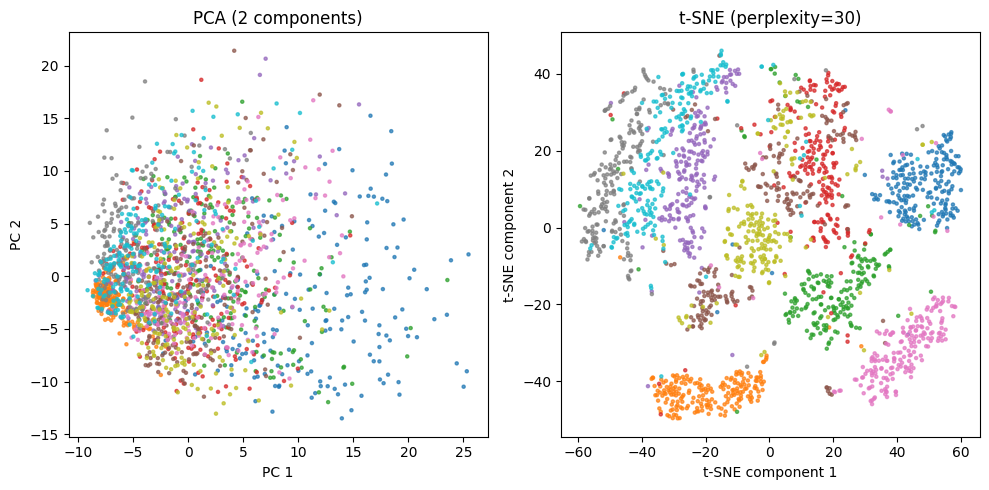


PCA Silhouette Score: -0.0844
Best t-SNE perplexity based on silhouette score: 30 (score: 0.1876)


In [ ]:
plt.figure(figsize=(10, 5))

# Plot PCA 2D embedding
plt.subplot(1, 2, 1)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y_sampled, cmap='tab10', s=5, alpha=0.7)
plt.title('PCA (2 components)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Plot best t-SNE embedding (based on silhouette score)
best_idx = np.argmax(silhouette_scores)
plt.subplot(1, 2, 2)
plt.scatter(embeddings[best_idx][:, 0], embeddings[best_idx][:, 1],
           c=y_sampled, cmap='tab10', s=5, alpha=0.7)
plt.title(f't-SNE (perplexity={perplexities[best_idx]})')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

plt.tight_layout()
plt.savefig('pca_vs_tsne.png')
plt.show()

# Compute silhouette score for PCA
pca_silhouette = silhouette_score(X_pca2, y_sampled)
print(f"\nPCA Silhouette Score: {pca_silhouette:.4f}")

# Print best perplexity
print(f"Best t-SNE perplexity based on silhouette score: {perplexities[best_idx]} (score: {silhouette_scores[best_idx]:.4f})")